In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')

In [121]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [123]:
import datetime as dt

In [124]:
#convert the train['instock_date'] formate (object to datetime)
train['instock_date']=pd.to_datetime(train['instock_date'])

In [125]:
def get_year_month(train):
    train['instock_year'] = train['instock_date'].dt.year
    train['instock_month'] = train['instock_date'].dt.month
    train.drop(columns = ['instock_date'],inplace = True)
    return train

In [126]:
train = get_year_month(train)

In [127]:
train.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
0,BRAE2NF6JA5GUEXG,37.0,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8
1,TUNE8SFB6RJN2HSD,38.0,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3
2,BRAEAR7WZPQGPBZU,9.0,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3
4,JWSEBUKYQPMBZ3RK,7.0,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3


In [128]:
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()

In [129]:
train['Loyalty_customer']  = label_en.fit_transform(train['Loyalty_customer'])
train['Product_Category'] = label_en.fit_transform(train['Product_Category'])

In [130]:
train.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
0,BRAE2NF6JA5GUEXG,37.0,2,Lillyann,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,2015,8
1,TUNE8SFB6RJN2HSD,38.0,24,Klynn,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,2016,3
2,BRAEAR7WZPQGPBZU,9.0,447,Ridge,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,2015,8
3,WATDZ2ZQ8JPDHCTJ,50.0,23,Abran,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,2016,3
4,JWSEBUKYQPMBZ3RK,7.0,63,Dustyn,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,2016,3


In [131]:
train['Product_Category'].value_counts()

7    682
8    676
0    658
1    649
5    632
9    620
6    620
4    617
2    610
3    604
Name: Product_Category, dtype: int64

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   Market_Category   6368 non-null   int64  
 3   Customer_name     6157 non-null   object 
 4   Loyalty_customer  6368 non-null   int32  
 5   Product_Category  6368 non-null   int32  
 6   Grade             6368 non-null   int64  
 7   Demand            6368 non-null   int64  
 8   Discount_avail    6330 non-null   float64
 9   charges_1         6170 non-null   float64
 10  charges_2 (%)     6163 non-null   float64
 11  Minimum_price     6330 non-null   float64
 12  Maximum_price     6025 non-null   float64
 13  Selling_Price     6327 non-null   float64
 14  instock_year      6368 non-null   int64  
 15  instock_month     6368 non-null   int64  
dtypes: float64(7), int32(2), int64(5), object(

In [133]:
train = train[train.Selling_Price>0]


In [134]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6313 non-null   object 
 1   Stall_no          6308 non-null   float64
 2   Market_Category   6313 non-null   int64  
 3   Customer_name     6107 non-null   object 
 4   Loyalty_customer  6313 non-null   int32  
 5   Product_Category  6313 non-null   int32  
 6   Grade             6313 non-null   int64  
 7   Demand            6313 non-null   int64  
 8   Discount_avail    6276 non-null   float64
 9   charges_1         6116 non-null   float64
 10  charges_2 (%)     6109 non-null   float64
 11  Minimum_price     6275 non-null   float64
 12  Maximum_price     5973 non-null   float64
 13  Selling_Price     6313 non-null   float64
 14  instock_year      6313 non-null   int64  
 15  instock_month     6313 non-null   int64  
dtypes: float64(7), int32(2), int64(5), object(

In [135]:
train.corr()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month
Stall_no,1.000000,-0.005510,0.007874,-0.012938,-0.004814,0.003864,-0.020568,-0.010883,-0.002274,-0.000112,0.007195,0.010488,0.013453,-0.013611
Market_Category,-0.005510,1.000000,0.033993,-0.001194,-0.035270,-0.019035,-0.002265,0.018458,0.024758,0.196087,0.135300,0.140817,-0.153564,0.088784
Loyalty_customer,0.007874,0.033993,1.000000,-0.019560,0.025961,0.005584,-0.021671,0.007357,0.012665,0.093103,0.118079,0.098101,-0.051363,0.039412
Product_Category,-0.012938,-0.001194,-0.019560,1.000000,0.010116,-0.022469,-0.027317,0.210196,-0.476116,0.001523,-0.012385,0.015742,0.000153,0.003550
Grade,-0.004814,-0.035270,0.025961,0.010116,1.000000,0.010351,-0.026533,-0.024284,-0.015682,-0.077558,0.166004,0.085304,0.025291,-0.031596
Demand,0.003864,-0.019035,0.005584,-0.022469,0.010351,1.000000,0.008346,-0.008754,0.017962,0.009128,0.003881,-0.001620,-0.010616,0.014793
Discount_avail,-0.020568,-0.002265,-0.021671,-0.027317,-0.026533,0.008346,1.000000,-0.004727,0.019177,0.010669,-0.003494,-0.519377,0.135851,-0.086759
charges_1,-0.010883,0.018458,0.007357,0.210196,-0.024284,-0.008754,-0.004727,1.000000,0.271043,0.018015,0.011258,0.053202,-0.015931,0.012842
charges_2 (%),-0.002274,0.024758,0.012665,-0.476116,-0.015682,0.017962,0.019177,0.271043,1.000000,0.005911,0.010813,0.009285,-0.000817,-0.006442
Minimum_price,-0.000112,0.196087,0.093103,0.001523,-0.077558,0.009128,0.010669,0.018015,0.005911,1.000000,0.707846,0.705838,0.055513,-0.012528


In [136]:
col = ['Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']

In [137]:
#fill nan values by Product_Category
for i in col:
    
    mean0 = train.groupby('Product_Category').mean()[i].round().loc[0]
    mean1 = train.groupby('Product_Category').mean()[i].round().loc[1]
    mean2 = train.groupby('Product_Category').mean()[i].round().loc[2]
    mean3 = train.groupby('Product_Category').mean()[i].round().loc[3]
    mean4 = train.groupby('Product_Category').mean()[i].round().loc[4]
    mean5 = train.groupby('Product_Category').mean()[i].round().loc[5]
    mean6 = train.groupby('Product_Category').mean()[i].round().loc[6]
    mean7 = train.groupby('Product_Category').mean()[i].round().loc[7]
    mean8 = train.groupby('Product_Category').mean()[i].round().loc[8]
    mean9 = train.groupby('Product_Category').mean()[i].round().loc[9]
    train.loc[train['Product_Category']==0,i]= train.loc[train['Product_Category']==0,i].fillna(value=mean0)
    train.loc[train['Product_Category']==1,i]= train.loc[train['Product_Category']==1,i].fillna(value=mean1) 
    train.loc[train['Product_Category']==2,i]= train.loc[train['Product_Category']==2,i].fillna(value=mean2) 
    train.loc[train['Product_Category']==3,i]= train.loc[train['Product_Category']==3,i].fillna(value=mean3) 
    train.loc[train['Product_Category']==4,i]= train.loc[train['Product_Category']==4,i].fillna(value=mean4) 
    train.loc[train['Product_Category']==5,i]= train.loc[train['Product_Category']==5,i].fillna(value=mean5) 
    train.loc[train['Product_Category']==6,i]= train.loc[train['Product_Category']==6,i].fillna(value=mean6) 
    train.loc[train['Product_Category']==7,i]= train.loc[train['Product_Category']==7,i].fillna(value=mean7) 
    train.loc[train['Product_Category']==8,i]= train.loc[train['Product_Category']==8,i].fillna(value=mean8) 
    train.loc[train['Product_Category']==9,i]= train.loc[train['Product_Category']==9,i].fillna(value=mean9)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6313 non-null   object 
 1   Stall_no          6308 non-null   float64
 2   Market_Category   6313 non-null   int64  
 3   Customer_name     6107 non-null   object 
 4   Loyalty_customer  6313 non-null   int32  
 5   Product_Category  6313 non-null   int32  
 6   Grade             6313 non-null   int64  
 7   Demand            6313 non-null   int64  
 8   Discount_avail    6313 non-null   float64
 9   charges_1         6313 non-null   float64
 10  charges_2 (%)     6313 non-null   float64
 11  Minimum_price     6313 non-null   float64
 12  Maximum_price     6313 non-null   float64
 13  Selling_Price     6313 non-null   float64
 14  instock_year      6313 non-null   int64  
 15  instock_month     6313 non-null   int64  
dtypes: float64(7), int32(2), int64(5), object(

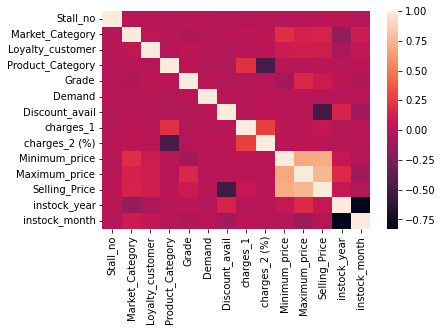

In [138]:
sns.heatmap(train.corr())
plt.show()

<AxesSubplot:xlabel='charges_1', ylabel='Count'>

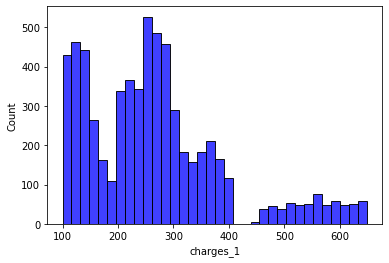

In [139]:
sns.histplot(train.charges_1,color = 'b')

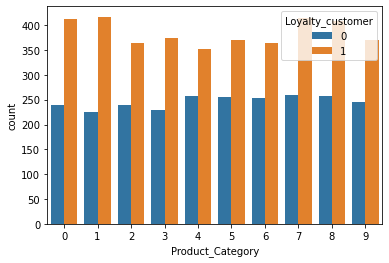

In [140]:
sns.countplot(x= 'Product_Category',data = train,hue = 'Loyalty_customer')
plt.show()

In [141]:
train = train[train['Selling_Price'].notna()]

In [142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6313 non-null   object 
 1   Stall_no          6308 non-null   float64
 2   Market_Category   6313 non-null   int64  
 3   Customer_name     6107 non-null   object 
 4   Loyalty_customer  6313 non-null   int32  
 5   Product_Category  6313 non-null   int32  
 6   Grade             6313 non-null   int64  
 7   Demand            6313 non-null   int64  
 8   Discount_avail    6313 non-null   float64
 9   charges_1         6313 non-null   float64
 10  charges_2 (%)     6313 non-null   float64
 11  Minimum_price     6313 non-null   float64
 12  Maximum_price     6313 non-null   float64
 13  Selling_Price     6313 non-null   float64
 14  instock_year      6313 non-null   int64  
 15  instock_month     6313 non-null   int64  
dtypes: float64(7), int32(2), int64(5), object(

In [143]:
y = train['Selling_Price'].values

In [144]:
y.shape

(6313,)

In [145]:
y = y.reshape(-1,1)

In [146]:
y

array([[ 4185.9477  ],
       [ 9271.490256],
       [ 6785.701362],
       ...,
       [10218.878775],
       [ 5359.493997],
       [ 5220.013568]])

In [147]:
x = train.drop(['Product_id','Stall_no','Customer_name','Selling_Price'],axis = 1).values

In [148]:
x

array([[2.0000e+00, 1.0000e+00, 3.0000e+00, ..., 4.7130e+03, 2.0150e+03,
        8.0000e+00],
       [2.4000e+01, 1.0000e+00, 3.0000e+00, ..., 1.0352e+04, 2.0160e+03,
        3.0000e+00],
       [4.4700e+02, 1.0000e+00, 0.0000e+00, ..., 7.3090e+03, 2.0150e+03,
        8.0000e+00],
       ...,
       [3.5800e+02, 0.0000e+00, 8.0000e+00, ..., 1.4614e+04, 2.0150e+03,
        1.1000e+01],
       [4.5200e+02, 1.0000e+00, 8.0000e+00, ..., 5.8490e+03, 2.0150e+03,
        1.2000e+01],
       [5.8000e+01, 1.0000e+00, 9.0000e+00, ..., 5.3830e+03, 2.0160e+03,
        1.0000e+00]])

In [149]:
x.shape

(6313, 12)

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [151]:
x = sc.fit_transform(x)

In [206]:
from sklearn.ensemble import RandomForestRegressor
lf=RandomForestRegressor(max_depth=19)

In [207]:
lf.fit(x,y)

C:\Users\hb728\AppData\Local\Temp\ipykernel_6708\2137130177.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lf.fit(x,y)


RandomForestRegressor(max_depth=19)

In [208]:
lf.score(x,y)

0.998541541372062

In [209]:
test

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month
0,SCHE4YSTDVPVZVXW,39.0,205,Ivanka,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1
1,ACCEGCATKHNRXUHW,49.0,3,Isaak,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8
2,NKCE6GJ5XVJDXNNZ,1.0,183,Analiese,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11
3,NKCEB8BK3ZXDHDHM,8.0,358,Rusty,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11
4,TOPEFDXSAHRNPF94,33.0,167,Eloise,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,58,Davion,1,7,0,39,0,117.0,5.0,3094.0,4674,2015,8
3426,RTRDYPA4PJHCJCGF,30.0,358,Maiah,1,9,3,17,0,509.0,6.0,3384.0,14105,2015,12
3427,TUNE8FWQBS7TVVT7,14.0,106,Gwendolen,1,2,0,36,0,150.0,17.0,710.0,10894,2016,3
3428,NKCEGMUABCRGUZPE,1.0,104,Addilynn,1,0,0,63,0,325.0,15.0,1477.0,5165,2015,5


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   Market_Category   3430 non-null   int64  
 3   Customer_name     3377 non-null   object 
 4   Loyalty_customer  3430 non-null   int32  
 5   Product_Category  3430 non-null   int32  
 6   Grade             3430 non-null   int64  
 7   Demand            3430 non-null   int64  
 8   Discount_avail    3430 non-null   int64  
 9   charges_1         3430 non-null   float64
 10  charges_2 (%)     3430 non-null   float64
 11  Minimum_price     3430 non-null   float64
 12  Maximum_price     3430 non-null   int64  
 13  instock_year      3430 non-null   int64  
 14  instock_month     3430 non-null   int64  
dtypes: float64(4), int32(2), int64(7), object(2)
memory usage: 375.3+ KB


In [211]:
test['instock_date'] = pd.to_datetime(test['instock_date'])

KeyError: 'instock_date'

In [ ]:
def get_year_month(test):
    test['instock_year'] = test['instock_date'].dt.year
    test['instock_month'] = test['instock_date'].dt.month
    test.drop(columns = ['instock_date'],inplace = True)
    return test

In [212]:
test = get_year_month(test)

KeyError: 'instock_date'

In [213]:
test.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month
0,SCHE4YSTDVPVZVXW,39.0,205,Ivanka,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1
1,ACCEGCATKHNRXUHW,49.0,3,Isaak,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8
2,NKCE6GJ5XVJDXNNZ,1.0,183,Analiese,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11
3,NKCEB8BK3ZXDHDHM,8.0,358,Rusty,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11
4,TOPEFDXSAHRNPF94,33.0,167,Eloise,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5


In [214]:
test['Loyalty_customer'] = label_en.fit_transform(test['Loyalty_customer'])
test['Product_Category'] = label_en.fit_transform(test['Product_Category'])

In [215]:
test.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month
0,SCHE4YSTDVPVZVXW,39.0,205,Ivanka,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1
1,ACCEGCATKHNRXUHW,49.0,3,Isaak,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8
2,NKCE6GJ5XVJDXNNZ,1.0,183,Analiese,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11
3,NKCEB8BK3ZXDHDHM,8.0,358,Rusty,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11
4,TOPEFDXSAHRNPF94,33.0,167,Eloise,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5


In [216]:
col1 = ['charges_1','charges_2 (%)','Minimum_price']

In [217]:
for i in col:
    
    tmean0 = test.groupby('Product_Category').mean()[i].round().loc[0]
    tmean1 = test.groupby('Product_Category').mean()[i].round().loc[1]
    tmean2 = test.groupby('Product_Category').mean()[i].round().loc[2]
    tmean3 = test.groupby('Product_Category').mean()[i].round().loc[3]
    tmean4 = test.groupby('Product_Category').mean()[i].round().loc[4]
    tmean5 = test.groupby('Product_Category').mean()[i].round().loc[5]
    tmean6 = test.groupby('Product_Category').mean()[i].round().loc[6]
    tmean7 = test.groupby('Product_Category').mean()[i].round().loc[7]
    tmean8 = test.groupby('Product_Category').mean()[i].round().loc[8]
    tmean9 = test.groupby('Product_Category').mean()[i].round().loc[9]
    test.loc[test['Product_Category']==0,i]= test.loc[test['Product_Category']==0,i].fillna(value=tmean0)
    test.loc[test['Product_Category']==1,i]= test.loc[test['Product_Category']==1,i].fillna(value=tmean1) 
    test.loc[test['Product_Category']==2,i]= test.loc[test['Product_Category']==2,i].fillna(value=tmean2) 
    test.loc[test['Product_Category']==3,i]= test.loc[test['Product_Category']==3,i].fillna(value=tmean3) 
    test.loc[test['Product_Category']==4,i]= test.loc[test['Product_Category']==4,i].fillna(value=tmean4) 
    test.loc[test['Product_Category']==5,i]= test.loc[test['Product_Category']==5,i].fillna(value=tmean5) 
    test.loc[test['Product_Category']==6,i]= test.loc[test['Product_Category']==6,i].fillna(value=tmean6) 
    test.loc[test['Product_Category']==7,i]= test.loc[test['Product_Category']==7,i].fillna(value=tmean7) 
    test.loc[test['Product_Category']==8,i]= test.loc[test['Product_Category']==8,i].fillna(value=tmean8) 
    test.loc[test['Product_Category']==9,i]= test.loc[test['Product_Category']==9,i].fillna(value=tmean9)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   Market_Category   3430 non-null   int64  
 3   Customer_name     3377 non-null   object 
 4   Loyalty_customer  3430 non-null   int64  
 5   Product_Category  3430 non-null   int64  
 6   Grade             3430 non-null   int64  
 7   Demand            3430 non-null   int64  
 8   Discount_avail    3430 non-null   int64  
 9   charges_1         3430 non-null   float64
 10  charges_2 (%)     3430 non-null   float64
 11  Minimum_price     3430 non-null   float64
 12  Maximum_price     3430 non-null   int64  
 13  instock_year      3430 non-null   int64  
 14  instock_month     3430 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 402.1+ KB
None


In [218]:
x_test = test.drop(['Product_id','Stall_no','Customer_name'],axis = 1).values

In [219]:
x_test.shape

(3430, 12)

In [220]:
x_test = sc.fit_transform(x_test)

In [233]:
y_pred1 = lf.predict(x_test)
print(y_pred1)

[ 3390.51803757  2068.63005204 11852.62286814 ...  6666.3130941
  3721.76303814  1030.03445715]


In [188]:
s=0
for i in range(len(y_pred1)):
    if y_pred1[i]<0:
        print(y_pred1[i])
        s+=1
print(s)

0


In [234]:
y_pred1.shape

(3430,)

In [224]:
pro_id = test['Product_id'].values

In [225]:
#pro_id = pro_id.reshape(-1,1)
pro_id.shape

(3430,)

In [235]:
out = pd.DataFrame(list(zip(pro_id,y_pred1)),columns = ['Product_id','Selling_Price'])

In [236]:
out

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3390.518038
1,ACCEGCATKHNRXUHW,2068.630052
2,NKCE6GJ5XVJDXNNZ,11852.622868
3,NKCEB8BK3ZXDHDHM,9815.233184
4,TOPEFDXSAHRNPF94,5739.853346
...,...,...
3425,BBAE9K7BXFUTDNBK,4121.373309
3426,RTRDYPA4PJHCJCGF,9535.405112
3427,TUNE8FWQBS7TVVT7,6666.313094
3428,NKCEGMUABCRGUZPE,3721.763038


In [237]:
out = out[out.Selling_Price>0]


In [238]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3430 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_id     3430 non-null   object 
 1   Selling_Price  3430 non-null   float64
dtypes: float64(1), object(1)
memory usage: 80.4+ KB


In [232]:
output = out.to_csv(r'E:\hackerearth\1\output_.csv',index = False)